In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.csv to kaggle.csv


In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

# Load the dataset
data = pd.read_csv('kaggle.csv')  # Assuming your dataset is in a CSV file

In [3]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Split the dataset into features and labels
X = data.iloc[:, 2:].values  # Assuming the features start from the third column
y = data['Label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Encode labels as one-hot vectors
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes)

In [4]:
from keras.callbacks import EarlyStopping

# Define the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

# Train the model with early stopping
history = model.fit(X_train, y_train_encoded, epochs=400, batch_size=30, validation_data=(X_test, y_test_encoded), callbacks=[early_stop])

Epoch 1/400
10505/10505 [==============================] - 23s 2ms/step - loss: 0.0864 - accuracy: 0.9756 - val_loss: 0.0486 - val_accuracy: 0.9874
Epoch 2/400
10505/10505 [==============================] - 22s 2ms/step - loss: 0.0501 - accuracy: 0.9873 - val_loss: 0.0409 - val_accuracy: 0.9901
Epoch 3/400
10505/10505 [==============================] - 27s 3ms/step - loss: 0.0418 - accuracy: 0.9900 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 4/400
10505/10505 [==============================] - 23s 2ms/step - loss: 0.0371 - accuracy: 0.9911 - val_loss: 0.0343 - val_accuracy: 0.9918
Epoch 5/400
10505/10505 [==============================] - 22s 2ms/step - loss: 0.0360 - accuracy: 0.9914 - val_loss: 0.0342 - val_accuracy: 0.9921
Epoch 6/400
10505/10505 [==============================] - 21s 2ms/step - loss: 0.0349 - accuracy: 0.9917 - val_loss: 0.0346 - val_accuracy: 0.9918
Epoch 7/400
10505/10505 [==============================] - 23s 2ms/step - loss: 0.0343 - accuracy: 0.9919 - val_

In [6]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have the trained model stored in the variable 'model' and the test data stored in 'X_test' and 'y_test_encoded'

# Make predictions on the test data
y_pred_encoded = model.predict(X_test)

# Convert the predictions from one-hot encoded format to class labels
y_pred = np.argmax(y_pred_encoded, axis=1)

# Convert the true labels from one-hot encoded format to class labels
y_true = np.argmax(y_test_encoded, axis=1)

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred, digits=5)

print(report)


4221/4221 [==============================] - 9s 2ms/step
              precision    recall  f1-score   support

           0    0.99211   0.99912   0.99560    103716
           1    0.99703   0.97371   0.98523     31337

    accuracy                        0.99322    135053
   macro avg    0.99457   0.98641   0.99042    135053
weighted avg    0.99325   0.99322   0.99320    135053



4221/4221 [==============================] - 6s 1ms/step - loss: 0.0295 - accuracy: 0.9932
Test Loss: 0.02949
Test Accuracy: 0.99322
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103716
           1       1.00      1.00      1.00     31337

    accuracy                           1.00    135053
   macro avg       1.00      1.00      1.00    135053
weighted avg       1.00      1.00      1.00    135053



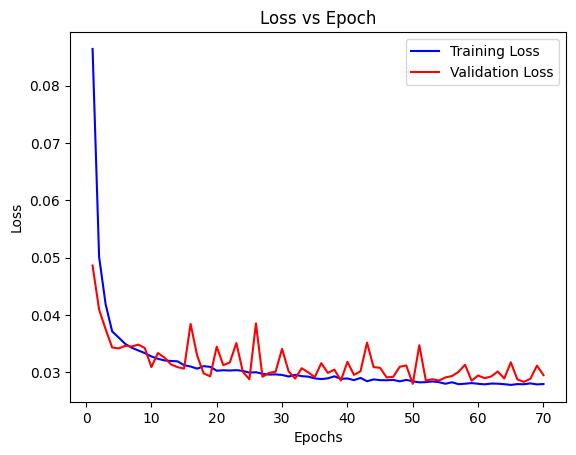

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss: {:.5f}".format(loss))
print("Test Accuracy: {:.5f}".format(accuracy))

from sklearn.metrics import classification_report

# Assuming you have predictions for the test data in the variable 'y_pred_encoded'

# Convert the predictions from one-hot encoded format to class labels
y_pred = np.argmax(y_test_encoded, axis=1)

# Convert the true labels from one-hot encoded format to class labels
y_true = np.argmax(y_test_encoded, axis=1)

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred)

print(report)


# Plot the loss vs epoch graph
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()